In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [2]:
# project_folder = './gdrive/My Drive/Colab Notebooks/body-composition/'
data_folder = "./DATA/" + "L3-data/"
# model_folder = project_folder + "L3-weight/"

In [7]:
mip_list = np.load(data_folder + 'mip_list.npy', allow_pickle=True)
label_list = np.load(data_folder + 'mask_list.npy', allow_pickle=True)
name_list = np.load(data_folder + 'name_list.npy', allow_pickle=True)

In [73]:
from helper_function import *

(array([162, 162, 162, ..., 198, 198, 198], dtype=int64), array([185, 186, 187, ..., 138, 139, 140], dtype=int64))


C:\Users\iir\.conda\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\iir\.conda\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


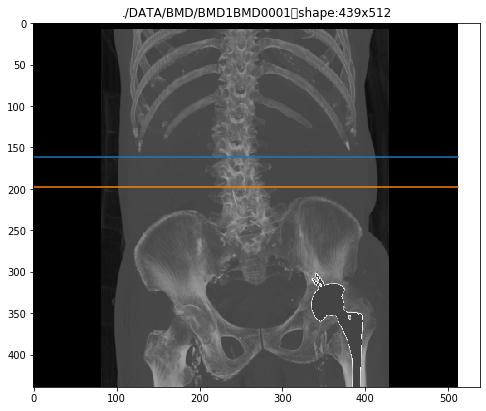

In [20]:
for mip, name, label in zip(mip_list, name_list, label_list):
    processed_img = preprocess(mip)

    processed_img = resize_wo_interpolation(processed_img, -1, 512)
    
    gt_label = np.where(label > 0)
    
    visualize_L3(processed_img, [np.min(gt_label[0]), np.max(gt_label[0])], name)

In [25]:
all_patient_img = []
all_patient_label = []
all_patient_name = []
HEIGHT = 224
WIDTH = 512
STEP = 16

In [24]:
for mip, name, label in zip(mip_list, name_list, label_list):
    one_patient_img = []
    one_patient_label = []
    one_patient_name = []
    
    processed_img = preprocess(mip)
    processed_img = resize_wo_interpolation(processed_img, -1, 512)
    gt_label = np.where(label > 0)
    # visualize_L3(processed_img, [np.min(gt_label[0]), np.max(gt_label[0])], name)
    
    gt_label = int((np.min(gt_label[0]) + np.max(gt_label[0]))/2)
    top = gt_label - HEIGHT
    bottom = top + HEIGHT
    temp_gt = HEIGHT
    if(top < 0):
        diff = top * (-1)
        top = top + diff
        bottom = bottom + diff
        temp_gt = gt_label
    
    cnt = 0
    while(bottom < processed_img.shape[0]):
        if(bottom >= gt_label and top <= gt_label):
            target_img = processed_img[top: bottom]
            # plt.figure(figsize=(8,8))
            # plt.title("range:{},{}, temp:{}\n".format(top, bottom, temp_gt))
            # plt.imshow(target_img, cmap="gray")
            # plt.plot([0, 512], [temp_gt, temp_gt])

            one_patient_img.append(target_img)
            one_patient_label.append(temp_gt)
            one_patient_name.append(name+"_"+str(cnt))

            cnt += 1
            top += STEP
            bottom += STEP
            temp_gt -= STEP
        else:
            break
    all_patient_img.append(np.array(one_patient_img))
    all_patient_label.append(np.array(one_patient_label))
    all_patient_name.append(np.array(one_patient_name))

In [26]:
all_patient_img = np.array(all_patient_img)
all_patient_label = np.array(all_patient_label)
all_patient_name = np.array(all_patient_name)
print(all_patient_img.shape, all_patient_label.shape, all_patient_name.shape)

(95,) (95,) (95,)


In [31]:
idx_range = [idx for idx in range(all_patient_img.shape[0])]
split = train_test_split(idx_range, test_size = 0.2, random_state = 42)
(train_idx, valid_idx) = split

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]


In [57]:
train_img = np.array([])
valid_img = np.array([])
train_label = np.array([])
valid_label = np.array([])
train_name = np.array([])
valid_name = np.array([])
for i, idx in enumerate(train_idx):
    if(i == 0):
        train_img = all_patient_img[idx]
        train_label = all_patient_label[idx]
        train_name = all_patient_name[idx]
    else:
        train_img = np.append(train_img, all_patient_img[idx], axis=0)
        train_label = np.append(train_label, all_patient_label[idx], axis=0)
        train_name = np.append(train_name, all_patient_name[idx], axis=0)

for i, idx in enumerate(valid_idx):
    if(i == 0):
        valid_img = all_patient_img[idx]
        valid_label = all_patient_label[idx]
        valid_name = all_patient_name[idx]
    else:
        valid_img = np.append(valid_img, all_patient_img[idx], axis=0)
        valid_label = np.append(valid_label, all_patient_label[idx], axis=0)
        valid_name = np.append(valid_name, all_patient_name[idx], axis=0)

In [58]:
print(train_img.shape, train_label.shape, train_name.shape)

(898, 224, 512) (898,) (898,)


C:\Users\iir\.conda\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\iir\.conda\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


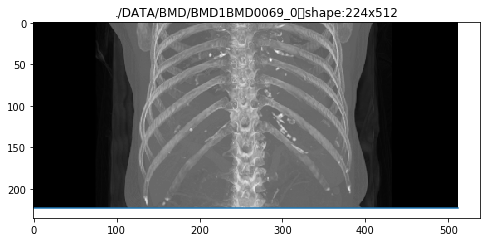

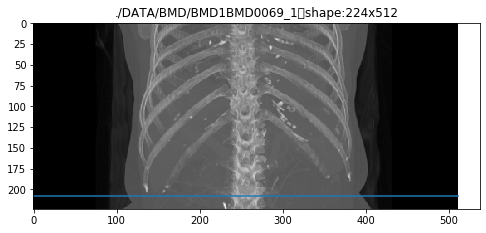

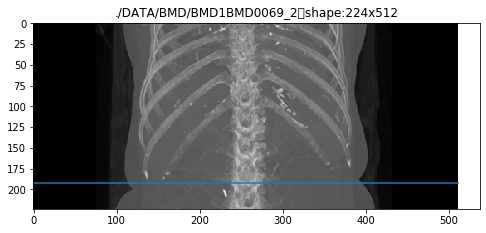

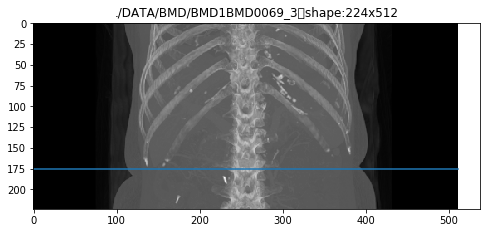

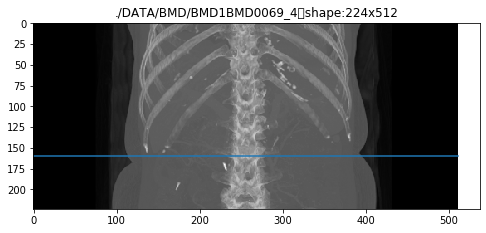

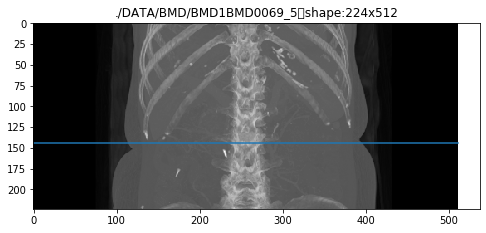

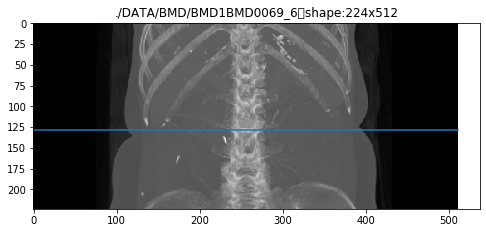

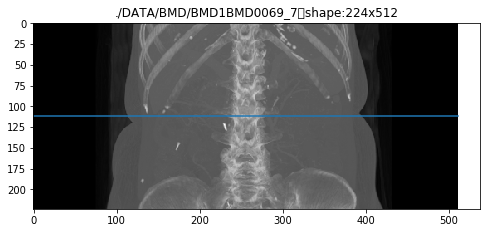

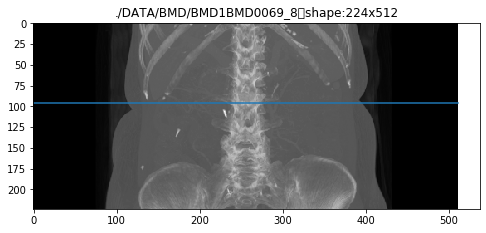

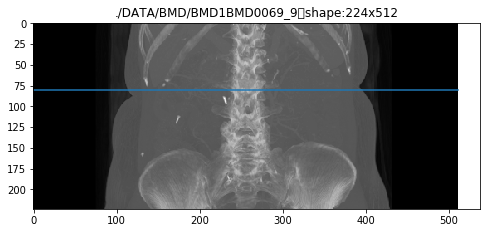

In [63]:
for i in range(10):
    visualize_L3(train_img[i], [train_label[i]], train_name[i])

In [62]:
train_img = train_img.astype('float32')
valid_img = valid_img.astype('float32')
train_label = train_label.astype('uint8')
valid_label = valid_label.astype('uint8')
np.save(data_folder + 'train_img.npy', train_img)
np.save(data_folder + 'valid_img.npy', valid_img)
np.save(data_folder + 'train_label.npy', train_label)
np.save(data_folder + 'valid_label.npy', valid_label)
np.save(data_folder + 'train_name.npy', train_name)
np.save(data_folder + 'valid_name.npy', valid_name)

# valid GT range

In [25]:
mip_list = np.load(data_folder + 'mip_list.npy', allow_pickle=True)
label_list = np.load(data_folder + 'label_list.npy', allow_pickle=True)
name_list = np.load(data_folder + 'name_list.npy', allow_pickle=True)

valid_img = np.load(data_folder + 'valid_img.npy')
valid_label = np.load(data_folder + 'valid_label.npy')
valid_name = np.load(data_folder + 'valid_name.npy')

In [28]:
name_list.shape
print(name_list)

['./DATA/BMD/BMD1BMD0001' './DATA/BMD/BMD1BMD0002'
 './DATA/BMD/BMD1BMD0003' './DATA/BMD/BMD1BMD0005'
 './DATA/BMD/BMD1BMD0006' './DATA/BMD/BMD1BMD0007'
 './DATA/BMD/BMD1BMD0008' './DATA/BMD/BMD1BMD0009'
 './DATA/BMD/BMD1BMD0010' './DATA/BMD/BMD1BMD0011'
 './DATA/BMD/BMD1BMD0012' './DATA/BMD/BMD1BMD0013'
 './DATA/BMD/BMD1BMD0014' './DATA/BMD/BMD1BMD0015'
 './DATA/BMD/BMD1BMD0016' './DATA/BMD/BMD1BMD0017'
 './DATA/BMD/BMD1BMD0018' './DATA/BMD/BMD1BMD0019'
 './DATA/BMD/BMD1BMD0020' './DATA/BMD/BMD1BMD0021'
 './DATA/BMD/BMD1BMD0022' './DATA/BMD/BMD1BMD0023'
 './DATA/BMD/BMD1BMD0024' './DATA/BMD/BMD1BMD0025'
 './DATA/BMD/BMD1BMD0026' './DATA/BMD/BMD1BMD0027'
 './DATA/BMD/BMD1BMD0028' './DATA/BMD/BMD1BMD0029'
 './DATA/BMD/BMD1BMD0030' './DATA/BMD/BMD1BMD0031'
 './DATA/BMD/BMD1BMD0032' './DATA/BMD/BMD1BMD0033'
 './DATA/BMD/BMD1BMD0034' './DATA/BMD/BMD1BMD0035'
 './DATA/BMD/BMD1BMD0036' './DATA/BMD/BMD1BMD0037'
 './DATA/BMD/BMD1BMD0038' './DATA/BMD/BMD1BMD0039'
 './DATA/BMD/BMD1BMD0040' './DA

In [27]:
unique_name = []
for name in valid_name:
    name, num = name.split("_")
    unique_name.append(name)
    print(name, num)
unique_name = set(unique_name)

./DATA/BMD/BMD1BMD0071 0
./DATA/BMD/BMD1BMD0071 1
./DATA/BMD/BMD1BMD0071 2
./DATA/BMD/BMD1BMD0071 3
./DATA/BMD/BMD1BMD0071 4
./DATA/BMD/BMD1BMD0071 5
./DATA/BMD/BMD1BMD0071 6
./DATA/BMD/BMD1BMD0071 7
./DATA/BMD/BMD1BMD0071 8
./DATA/BMD/BMD1BMD0071 9
./DATA/BMD/BMD1BMD0071 10
./DATA/BMD/BMD1BMD0071 11
./DATA/BMD/BMD1BMD0024 0
./DATA/BMD/BMD1BMD0024 1
./DATA/BMD/BMD1BMD0024 2
./DATA/BMD/BMD1BMD0024 3
./DATA/BMD/BMD1BMD0024 4
./DATA/BMD/BMD1BMD0024 5
./DATA/BMD/BMD1BMD0076 0
./DATA/BMD/BMD1BMD0076 1
./DATA/BMD/BMD1BMD0076 2
./DATA/BMD/BMD1BMD0076 3
./DATA/BMD/BMD1BMD0076 4
./DATA/BMD/BMD1BMD0076 5
./DATA/BMD/BMD1BMD0076 6
./DATA/BMD/BMD1BMD0076 7
./DATA/BMD/BMD1BMD0076 8
./DATA/BMD/BMD1BMD0076 9
./DATA/BMD/BMD1BMD0076 10
./DATA/BMD/BMD1BMD0076 11
./DATA/BMD/BMD1BMD0077 0
./DATA/BMD/BMD1BMD0077 1
./DATA/BMD/BMD1BMD0077 2
./DATA/BMD/BMD1BMD0077 3
./DATA/BMD/BMD1BMD0077 4
./DATA/BMD/BMD1BMD0077 5
./DATA/BMD/BMD1BMD0077 6
./DATA/BMD/BMD1BMD0077 7
./DATA/BMD/BMD1BMD0077 8
./DATA/BMD/BMD1BMD007

In [23]:
all_patient_gt_range = []
for name in unique_name:
    print(name)
    
    idx = np.where(name_list == name)
    print(idx)
    mip = mip_list[idx]
    label = label_list[idx]
    name_list = name_list[idx]

#     one_patient_gt_range = []
    
#     processed_img = preprocess(mip)
#     processed_img = resize_wo_interpolation(processed_img, -1, 512)
    
#     gt_label_img = np.where(label > 0)
#     gt_label_img = resize_wo_interpolation(gt_label_img, -1, 512)
#     # visualize_L3(processed_img, [np.min(gt_label[0]), np.max(gt_label[0])], name)
    
#     gt_mean_height = int((np.min(gt_label_img[0]) + np.max(gt_label_img[0]))/2)
    
#     top = gt_mean_height - HEIGHT
#     temp_gt_mean_height = HEIGHT
#     if(top < 0):
#         top = 0
#         temp_gt_mean_height = gt_mean_height
#     bottom = top + HEIGHT
    
#     cnt = 0
#     while(bottom < processed_img.shape[0]):
#         if(bottom >= gt_label and top <= gt_label):
#             target_img = processed_img[top: bottom]
#             target_gt_img = label[top:bottom]
            
#             plt.figure()
#             plt.imshow(target_img, cmap = 'gray')
#             plt.imshow(target_gt_img, alpha=0.3, cmap=ListedColormap(["#ffffff00", m]))
            
#             one_patient_gt_range.append(target_gt_range)

#             cnt += 1
#             top += STEP
#             bottom += STEP
#             temp_gt -= STEP
#         else:
#             break

./DATA/BMD/BMD1BMD0014
(array([12], dtype=int64),)
./DATA/BMD/BMD1BMD0077
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0050
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0030
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0024
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0028
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0088
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0042
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0006
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0020
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0044
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0085
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0012
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0048
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0001
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0041
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0076
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0058
(array([], dtype=int64),)
./DATA/BMD/BMD1BMD0071
(array([], dtype=int64),)


In [31]:
all_patient_gt_range = np.array(all_patient_gt_range)
all_patient_gt_range.shape

(95,)

In [33]:
idx_range = [idx for idx in range(all_patient_gt_range.shape[0])]
split = train_test_split(idx_range, test_size = 0.2, random_state = 42)
(train_idx, valid_idx) = split

In [36]:
train_gt_range = np.array([])
valid_gt_range = np.array([])

for i, idx in enumerate(train_idx):
    if(i == 0):
        train_gt_range = all_patient_gt_range[idx]
    else:
        train_gt_range = np.append(train_gt_range, all_patient_gt_range[idx], axis=0)
        
for i, idx in enumerate(valid_idx):
    if(i == 0):
        valid_gt_range = all_patient_gt_range[idx]
    else:
        valid_gt_range = np.append(valid_gt_range, all_patient_gt_range[idx], axis=0)

In [37]:
print(train_gt_range.shape, valid_gt_range.shape)

(898, 2) (216, 2)


In [40]:
np.save('train_gt_range.npy', train_gt_range)
np.save('valid_gt_range.npy', valid_gt_range)